In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor

from sklearn.linear_model import LinearRegression,BayesianRidge 

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from joblib import dump, load

from yellowbrick.regressor import ResidualsPlot
from yellowbrick.regressor import PredictionError
from yellowbrick.style import set_palette
set_palette('sns_pastel')
np.seterr(divide = 'ignore')

{'divide': 'ignore', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [8]:
df = pd.read_pickle('bikeshare.pkl')
df = df.reset_index().dropna()

In [9]:
df.columns

Index(['index', 'Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)',
       'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)',
       'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)',
       'Snowfall (cm)', 'Seasons', 'Holiday', 'Functioning Day', 'ideal_temp',
       'dist_from_ideal_temp', 'rental_log_trans'],
      dtype='object')

#### Experiment 0

Bring coefficients to standard scale and transform the target.

In [10]:
X,y = df[['Hour','Temperature(°C)']], df['Rented Bike Count']
X = X.dropna()
y = y.dropna()

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=10)

In [12]:
X_train = X_train[np.logical_not(np.isnan(X_train))]
X_train = X_train.to_numpy().reshape(-1,1)
y_train = y_train[np.logical_not(np.isnan(y_train))]
y_train = y_train.to_numpy()

#### Experiment 1 

Implement model with dist_from_ideal_temp as feature (+.01)

#### Experiment 2

Log transform target. Result: (-.27)

In [13]:
X,y = df[['Hour','dist_from_ideal_temp']], df['Rented Bike Count']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=10)

In [15]:
lr = LinearRegression()

In [16]:
model = lr.fit(X_train,y_train)

In [17]:
model.score(X_test,y_test)

0.4073018314459236

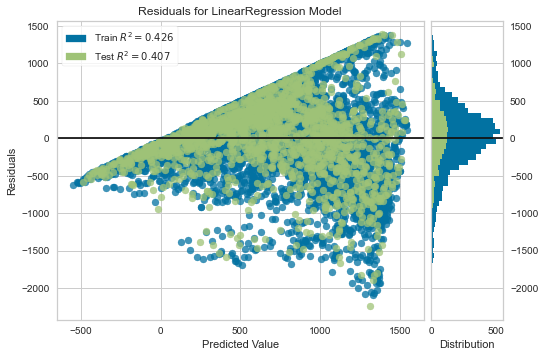

In [18]:
visualizer = ResidualsPlot(model)
visualizer.fit(X_train, y_train)
visualizer.score(X_test,y_test)
visualizer.show()

In [19]:
X,y = df[['Hour','dist_from_ideal_temp']], df['rental_log_trans']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=10)

In [21]:
lr = LinearRegression()

In [22]:
model_log_trans = lr.fit(X_train,y_train)

In [23]:
model_log_trans.score(X_test,y_test)

0.14519896458903525

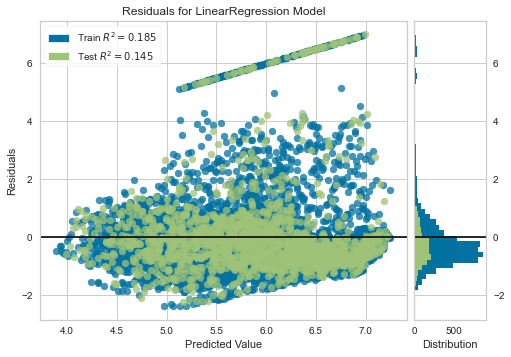

In [24]:
visualizer = ResidualsPlot(model_log_trans)
visualizer.fit(X_train, y_train)
visualizer.score(X_test,y_test)
visualizer.show()

#### Experiment 3

Try Random Forest Regressor. 

In [25]:
# untransformed target
X,y = df[['Hour', 'Temperature(°C)','Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)',
       'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)',
       'Snowfall (cm)']], df['Rented Bike Count']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=10)

In [27]:
rf_regr = RandomForestRegressor(max_depth=3, random_state=0)
rf_regr.fit(X_train, y_train)

RandomForestRegressor(max_depth=3, random_state=0)

In [28]:
rf_regr.score(X_test, y_test)

0.5940212528085755

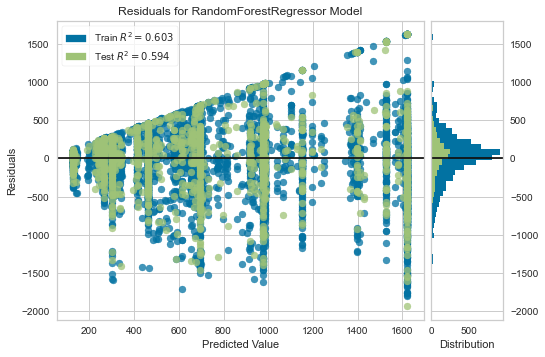

In [29]:
visualizer = ResidualsPlot(rf_regr)
visualizer.fit(X_train, y_train)
visualizer.score(X_test,y_test)
visualizer.show()

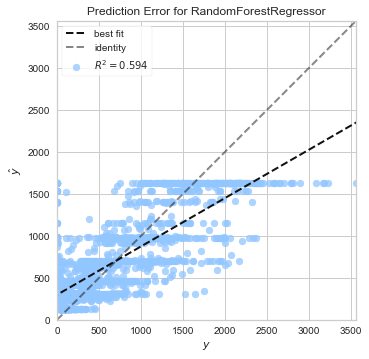

In [30]:
visualizer = PredictionError(rf_regr)
visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test)
visualizer.show()

In [31]:
from joblib import dump, load
dump(rf_regr, 'rf_regr.joblib')

['rf_regr.joblib']

In [32]:
# transformed target
X,y = df[['Hour', 'Temperature(°C)','Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)',
       'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)',
       'Snowfall (cm)']], df['rental_log_trans']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=10)

In [34]:
rf_regr = RandomForestRegressor(max_depth=3, random_state=0)
rf_regr.fit(X_train, y_train)

RandomForestRegressor(max_depth=3, random_state=0)

In [35]:
rf_regr.score(X_test, y_test)

0.26907380911749157

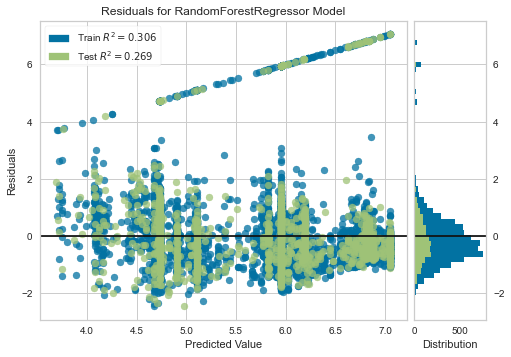

In [36]:
visualizer = ResidualsPlot(rf_regr)
visualizer.fit(X_train, y_train)
visualizer.score(X_test,y_test)
visualizer.show()

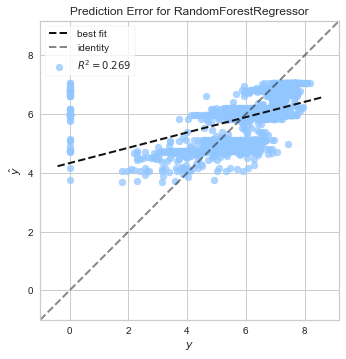

In [37]:
visualizer = PredictionError(rf_regr)
visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test)
visualizer.show()

In [39]:
df['precip'] = np.logical_or(np.where(df['Rainfall(mm)']>=2, 1,0), np.where(df['Snowfall (cm)']>=2,1,0)) 

In [42]:
df['precip'].value_counts(normalize=True)

False    0.963584
True     0.036416
Name: precip, dtype: float64